### ASSIGNMENT
Summarize the population characteristics within a half-mile (805 m) of the primary limited access highways in Buffalo. Create a summary by hwy_num.

1. Read the highway data
2. Buffer the highways
3. Read the block group data
4. Intersect the highway buffers with the block groups
5. Summarize the socioecomonic data for each highway                                                     
 A. Answer the following questions                                                                       
 B. Which highway has the highest proportion of non-white residents living within a half mile?                          
 C. Which highway has the lowest proportion of hispanic residents living within a half mile?                                            
Challenge - calculate the length of the primary highways in miles. Answer the questions above using per mile estimates (e.g. pct white per mile = white per mile/total per mile) Caution: make sure that your length estimates make sense!

In [1]:
import pandas as pd
import geopandas as gpd
import numpy
import folium
import matplotlib.pyplot as plt
from matplotlib import gridspec
# draw maps in the notebook
%matplotlib inline

In [2]:
url_rd = 'https://data.buffalony.gov/resource/45ez-ykin.geojson?$limit=1000000&\
$where=%28fcc%20like%20%27A1%25%27%20or%20fcc%20like%20%27A2%25%27%20or%20\
fcc%20like%20%27A3%25%27%20or%20fcc%20like%20%27A4%25%27%29'
url_bg = 'https://data.buffalony.gov/resource/u7fm-4kwb.geojson?$limit=1000000'

In [3]:
rd = gpd.read_file(url_rd)

In [4]:
rd[:3]

,jurisdiction,zipname_r,hwy_num,postal_r,gnis_l,street_typ,r_t_add,name_srce,mcd00_l,g_suf_cont,...,gnis_r,postdir,shape_stlength,g_st_name,postal_l,speed,geom_acc,place00_l,name_flag,geometry
0,01,Buffalo,62,14220,978764,Pkwy,969,TA Resource,11000,None,...,978764,None,583.66082595321507,MCKINLEY,14220,35,T,11000,2,(LINESTRING (-78.82367603300401 42.85644703954...
1,06,Buffalo,190,14202,978764,None,None,TA Resource,11000,None,...,978764,None,89.289810042832173,190,14202,65,T,11000,1,"(LINESTRING (-78.880825967333 42.881363036534,..."
2,12,Buffalo,None,14222,978764,Ave,None,TA Resource,11000,None,...,978764,None,24.92523452024286,BIRD,14222,25,T,11000,2,(LINESTRING (-78.87373602668001 42.92599995517...


In [5]:
bg=gpd.read_file(url_bg)

### All the roads in Buffalo

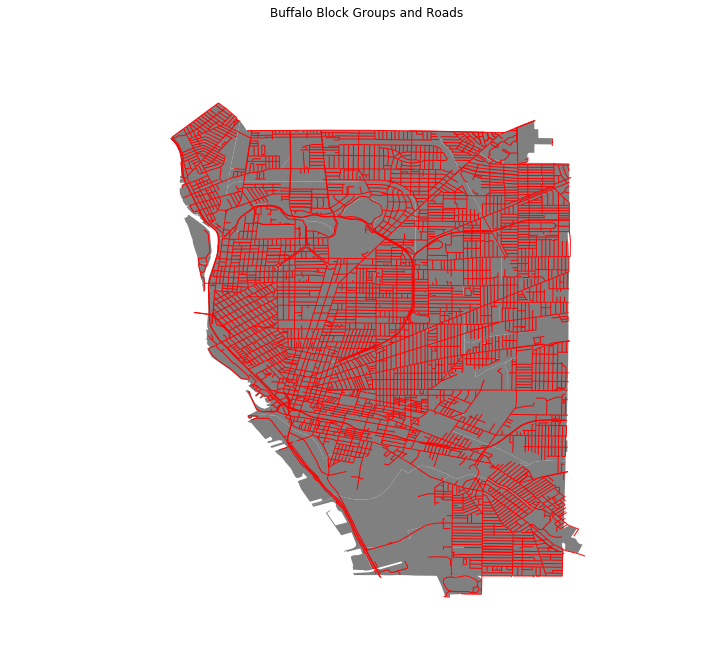

In [6]:
f, ax = plt.subplots(1, figsize=(12, 10))
# Base layer with all the areas for the background
bg.plot(facecolor='grey', linewidth=0.025, ax=ax)
# Roads
rd.plot(color='red', linewidth=1, ax=ax)

ax.set_axis_off()
f.suptitle('Buffalo Block Groups and Roads')
plt.axis('equal')
plt.show()

In [7]:
rd = rd.dropna(axis=0, subset=['hwy_num'])

### Buffalo Block Groups and Only Highways

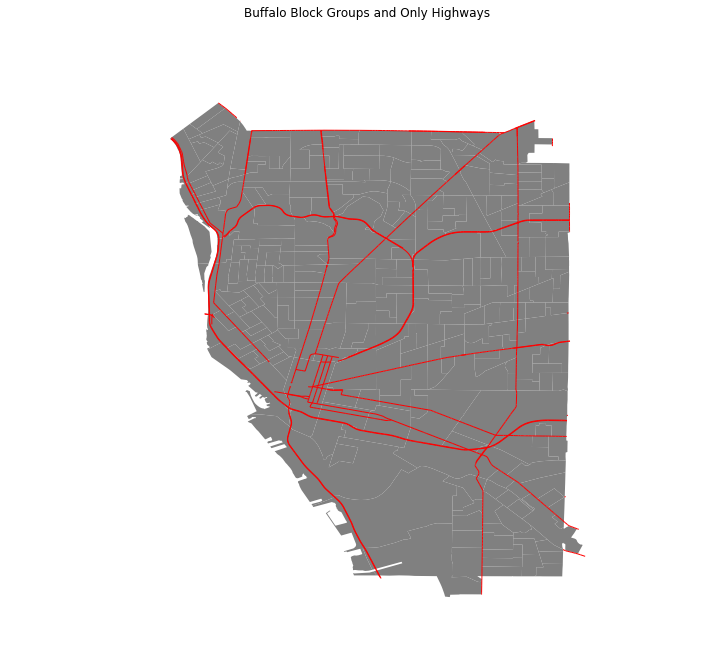

In [8]:
f, ax = plt.subplots(1, figsize=(12, 10))
# Base layer with all the areas for the background
bg.plot(facecolor='grey', linewidth=0.025, ax=ax)
# Roads
rd.plot(color='red', linewidth=1, ax=ax)

ax.set_axis_off()
f.suptitle('Buffalo Block Groups and Only Highways')
plt.axis('equal')
plt.show()

In [9]:
rd=rd[rd['fcc']=='A15']

In [10]:
bg = bg.to_crs({'init': 'epsg:3857'})
rd = rd.to_crs({'init': 'epsg:3857'})

In [11]:
hwys=rd.dissolve(by='hwy_num').copy().reset_index()
hwys['length_m']=(hwys.geometry.length*0.000621371)/2
hwys[:5]

,hwy_num,geometry,jurisdiction,zipname_r,postal_r,gnis_l,street_typ,r_t_add,name_srce,mcd00_l,...,gnis_r,postdir,shape_stlength,g_st_name,postal_l,speed,geom_acc,place00_l,name_flag,length_m
0,190,(LINESTRING (-8775153.716918258 5291882.042280...,06,Buffalo,14202,978764,None,None,TA Resource,11000,...,978764,None,89.289810042832173,190,14202,65,T,11000,1,13.880485
1,198,(LINESTRING (-8776819.278160788 5299771.023128...,01,Buffalo,14214,978764,None,None,TA Resource,11000,...,978764,None,87.394615598045846,198,14214,65,T,11000,1,4.675618
2,33,(LINESTRING (-8779138.063381437 5295734.920947...,01,Buffalo,14214,978764,None,None,TA Resource,11000,...,978764,None,105.9718207551023,33,14214,65,T,11000,1,6.788832
3,5,(LINESTRING (-8777898.62519433 5286538.6148021...,01,Buffalo,14203,978764,None,None,TA Resource,11000,...,978764,None,234.45339784022576,5,14203,65,T,11000,1,5.149639


### Buffalo Block Groups and Only four main Highways

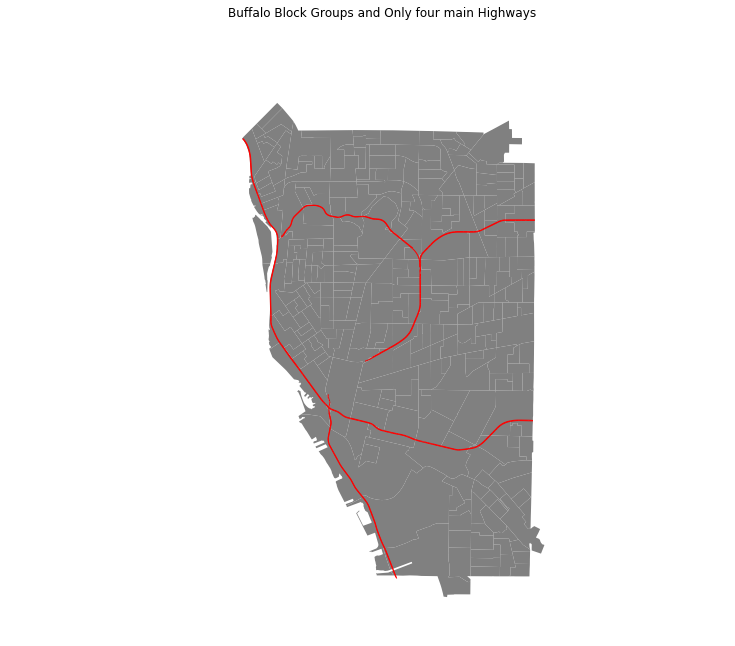

In [12]:
f, ax = plt.subplots(1, figsize=(12, 10))
# Base layer with all the areas for the background
bg.plot(facecolor='grey', linewidth=0.025, ax=ax)
# Roads
hwys.plot(color='red', linewidth=1, ax=ax)

ax.set_axis_off()
f.suptitle('Buffalo Block Groups and Only four main Highways')
plt.axis('equal')
plt.show()

### Length of four highways

In [13]:
hwy_g = hwys.groupby(['hwy_num'])['length_m'].sum()
hwy_g

hwy_num
190    13.880485
198     4.675618
33      6.788832
5       5.149639
Name: length_m, dtype: float64

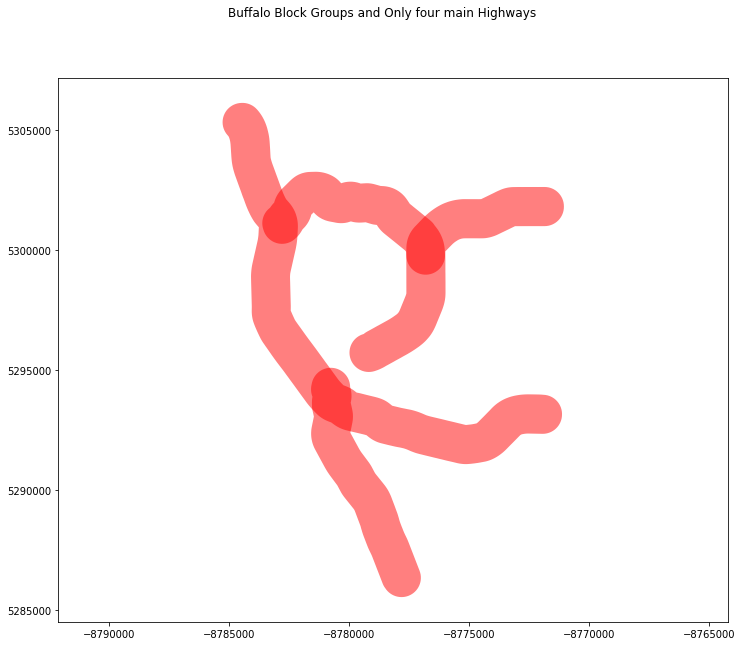

In [14]:
hwys['bufgeo']=hwys.buffer(805)# buffer returns a geoseries
hwys=hwys.set_geometry('bufgeo')
f, ax = plt.subplots(1, figsize=(12, 10))
# Roads
hwys.plot(alpha=0.5,facecolor='red', linewidth=0.025, ax=ax)
f.suptitle('Buffalo Block Groups and Only four main Highways')
plt.axis('equal')
plt.show()

In [15]:
rd.hwy_num.unique()

array(['190', '5', '33', '198'], dtype=object)

In [16]:
from geopandas.tools import overlay

In [22]:
bg['area_o']=bg['geometry'].area/10**6
bg.shape[0]

287

In [23]:
bg.head()

,city,statefp10,sumlev,geoid10_1,state,mtfcc10,blkgrp,total_pop,hawn_pi,intptlat10,...,occup,shape_stlength,white,other,shape_starea,hispanic,countyfp10,tractname10,geometry,area_o
0,None,36,150,360290029001,36,G5030,1,558,0,+42.9073233,...,186,0.016539546971277359,85,4,0.000016298273854477637,24,029,29,(POLYGON ((-8773260.612713685 5297547.50681027...,0.275742
1,None,36,150,360290164002,36,G5030,2,847,0,+42.8715885,...,365,0.044318779473935963,564,32,0.000052544670521426594,139,029,164,(POLYGON ((-8778381.643246422 5292700.73170696...,0.888460
2,None,36,150,360290054004,36,G5030,4,834,0,+42.9426394,...,402,0.043739770103819194,730,5,0.000048231512010102914,26,029,54,(POLYGON ((-8778202.752887724 5303531.18617119...,0.816471
3,None,36,150,360290033012,36,G5030,2,798,0,+42.9194490,...,334,0.019775636493135969,16,3,0.000024062812232653444,8,029,33.01,(POLYGON ((-8776810.03471069 5300096.944135602...,0.407186
4,None,36,150,360290167002,36,G5030,2,805,0,+42.8734981,...,358,0.016297307247398762,729,10,0.0000146992704021551,50,029,167,(POLYGON ((-8772437.961697761 5292481.39464935...,0.248553


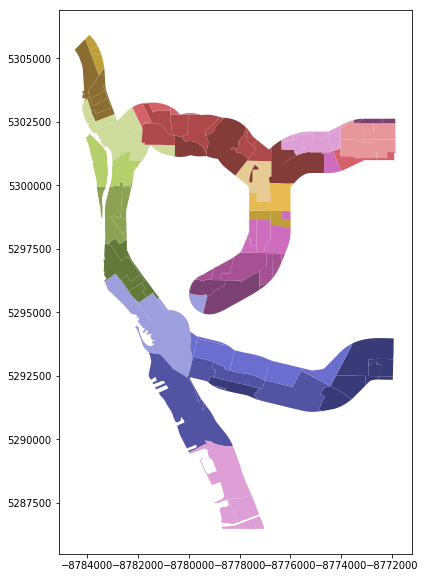

In [24]:
newdf = overlay(hwys, bg, how="intersection")#returns only those geometries that are contained by both GeoDataFrames
newdf['area_n']=newdf['geometry'].area/10**6
newdf.plot(figsize=(12,10),cmap='tab20b');

In [25]:
newdf.shape[0]

147

In [28]:
dups=newdf.total_pop.groupby(newdf['geoid10']).count().sort_values(ascending=False)
uniqueid=dups.to_frame(name='counts').reset_index()
uniqueid.head(8)

,geoid10,counts
0,360290165001,3
1,360290171005,2
2,360290052013,2
3,360290071022,2
4,360290071021,2
5,360290033011,2
6,360290033012,2
7,360290033013,2


In [29]:
uniqueid.shape[0] #28 Duplicates

119

### Apply ratio of areas to original variable

In [30]:
newdf['area_ratio']=newdf['area_n']/newdf['area_o']

In [32]:
fields = ['total_pop','hispanic','black','white', 'hse_units','occup']
newdf[fields] = newdf[fields].apply(pd.to_numeric, errors='coerce')

In [35]:
newdf['tPopn']=newdf['total_pop']*newdf['area_ratio']
newdf['tPopn']=newdf.tPopn.round()
newdf['hisp_n']=newdf['hispanic']*newdf['area_ratio']
newdf['hisp_n']=newdf.hisp_n.round()
newdf['black_n']=newdf['black']*newdf['area_ratio']
newdf['black_n']=newdf.black_n.round()
newdf['white_n']=newdf['white']*newdf['area_ratio']
newdf['white_n']=newdf.white_n.round()
newdf['hu_n']=newdf['hse_units']*newdf['area_ratio']
newdf['hu_n']=newdf.hu_n.round()
newdf['occup_n']=newdf['occup']*newdf['area_ratio']
newdf['occup_n']=newdf.occup_n.round()

### Summarize characteristics

In [36]:
bg_map=pd.merge(uniqueid,newdf,how='left')

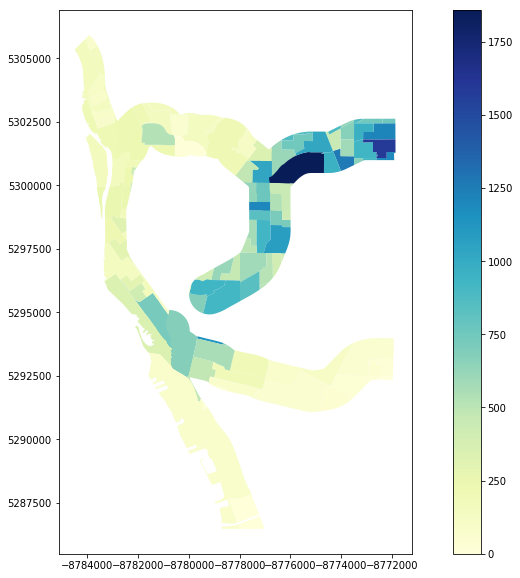

In [65]:
bg_map=bg_map.set_geometry('geometry')
bg_map.plot(column='black',cmap='YlGnBu',figsize=(15,10), legend=True);

In [39]:
fields = ['hwy_num','total_pop','tPopn','hispanic','hisp_n',
          'black','black_n','white', 'white_n', 'hse_units','hu_n','occup','occup_n']
newdf1=newdf.loc[:,fields]
groupdf = newdf1.groupby(['hwy_num']).sum().reset_index()
groupdf

,hwy_num,total_pop,tPopn,hispanic,hisp_n,black,black_n,white,white_n,hse_units,hu_n,occup,occup_n
0,190,52082,31206.0,12798,8166.0,12226,6966.0,29522,17772.0,26151,15802.0,21602,13002.0
1,198,29878,17195.0,2865,1599.0,13727,6904.0,12910,8413.0,13670,7359.0,11378,6180.0
2,33,48233,28127.0,1528,801.0,40812,25136.0,5393,1879.0,24850,14382.0,20205,11809.0
3,5,8986,3216.0,2042,697.0,2493,946.0,5257,1853.0,5160,1739.0,4117,1362.0


### Merge highways with BG datas

In [46]:
newhwys=hwys.copy().reset_index()
newhwys=newhwys.set_geometry("geometry")

In [47]:
finaldf=newhwys.merge(groupdf, on='hwy_num')
finaldf.head()

,index,hwy_num,geometry,jurisdiction,zipname_r,postal_r,gnis_l,street_typ,r_t_add,name_srce,...,hispanic,hisp_n,black,black_n,white,white_n,hse_units,hu_n,occup,occup_n
0,0,190,(LINESTRING (-8775153.716918258 5291882.042280...,06,Buffalo,14202,978764,None,None,TA Resource,...,12798,8166.0,12226,6966.0,29522,17772.0,26151,15802.0,21602,13002.0
1,1,198,(LINESTRING (-8776819.278160788 5299771.023128...,01,Buffalo,14214,978764,None,None,TA Resource,...,2865,1599.0,13727,6904.0,12910,8413.0,13670,7359.0,11378,6180.0
2,2,33,(LINESTRING (-8779138.063381437 5295734.920947...,01,Buffalo,14214,978764,None,None,TA Resource,...,1528,801.0,40812,25136.0,5393,1879.0,24850,14382.0,20205,11809.0
3,3,5,(LINESTRING (-8777898.62519433 5286538.6148021...,01,Buffalo,14203,978764,None,None,TA Resource,...,2042,697.0,2493,946.0,5257,1853.0,5160,1739.0,4117,1362.0


In [49]:
finaldf['length_m']

0    13.880485
1     4.675618
2     6.788832
3     5.149639
Name: length_m, dtype: float64

In [52]:
finaldf["pctwhite"]=(finaldf["white_n"]/finaldf["tPopn"])*100
finaldf["pctblack"]=(finaldf["black_n"]/finaldf["tPopn"])*100
finaldf["pcthispanic"]=(finaldf["hisp_n"]/finaldf["tPopn"])*100
finaldf["pctocchu"]=(finaldf["occup_n"]/finaldf["hu_n"])*100

In [54]:
finaldf["white_D"]=finaldf["white_n"]/finaldf["length_m"]
finaldf["black_D"]=finaldf["black_n"]/finaldf["length_m"]
finaldf["hispanic_D"]=finaldf["hisp_n"]/finaldf["length_m"]
finaldf["occup_D"]=finaldf["occup_n"]/finaldf["length_m"]

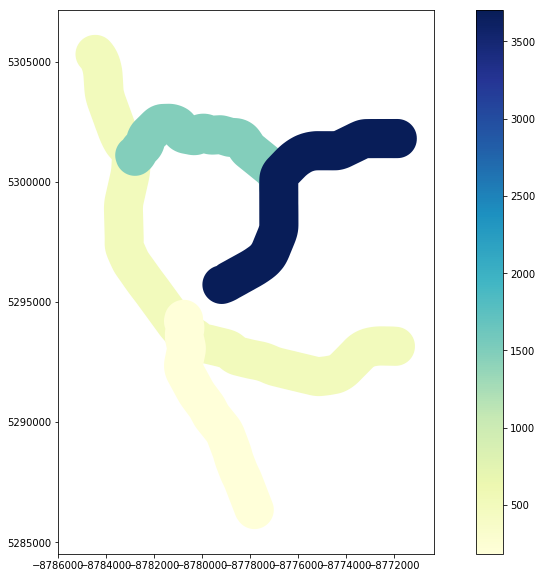

In [56]:
finaldf=finaldf.set_geometry('bufgeo')
finaldf.plot(column='black_D',cmap='YlGnBu',figsize=(15,10), legend=True);

* Mast of the black people are living around 33 road

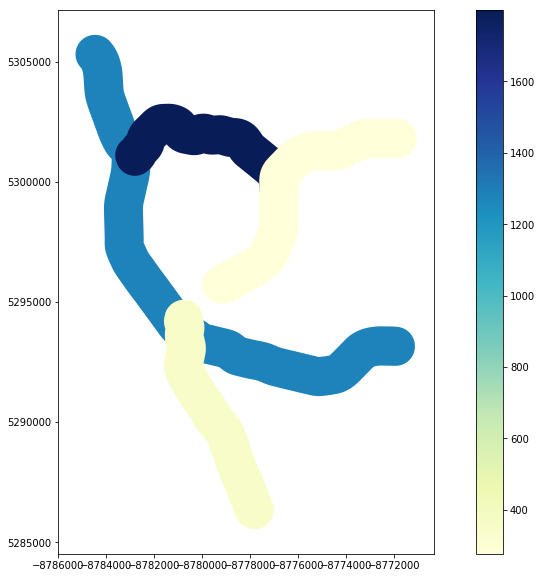

In [57]:
finaldf.plot(column='white_D',cmap='YlGnBu',figsize=(15,10), legend=True);

* Mast of the white people are living around 198 road

In [63]:
fields = ['hwy_num','total_pop','tPopn','hispanic','hisp_n','pcthispanic',
          'black','black_n','pctblack','black_D','white', 'white_n','pctwhite','white_D', 'hse_units','hu_n','occup','occup_n']
finaldf1=finaldf.loc[:,fields]
finaldf1

,hwy_num,total_pop,tPopn,hispanic,hisp_n,pcthispanic,black,black_n,pctblack,black_D,white,white_n,pctwhite,white_D,hse_units,hu_n,occup,occup_n
0,190,52082,31206.0,12798,8166.0,26.168045,12226,6966.0,22.322630,501.855647,29522,17772.0,56.950586,1280.358678,26151,15802.0,21602,13002.0
1,198,29878,17195.0,2865,1599.0,9.299215,13727,6904.0,40.151207,1476.596344,12910,8413.0,48.927014,1799.334450,13670,7359.0,11378,6180.0
2,33,48233,28127.0,1528,801.0,2.847797,40812,25136.0,89.366090,3702.551265,5393,1879.0,6.680414,276.778080,24850,14382.0,20205,11809.0
3,5,8986,3216.0,2042,697.0,21.672886,2493,946.0,29.415423,183.702193,5257,1853.0,57.618159,359.831040,5160,1739.0,4117,1362.0


#### Which highway has the highest proportion of non-white residents living within a half mile?

###### highway 33 has the highest proportion of non-white residents living within a half mile

#### Which highway has the lowest proportion of hispanic residents living within a half mile?

##### highway 33 has the lowest proportion of hispanic residents living within a half mile